<a href="https://colab.research.google.com/github/VIKASHlm/ASSIGNEMNT3/blob/main/football_lplayer_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/drive/MyDrive/final_data.csv')

In [3]:
df.head(20)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
5,/harry-maguire/profil/spieler/177907,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,...,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0
6,/victor-lindelof/profil/spieler/184573,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,...,0.000000,0.000000,5471,95,19,10,15000000,35000000,2,0
7,/phil-jones/profil/spieler/117996,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,...,0.000000,0.000000,416,932,169,7,2000000,20000000,2,0
8,/teden-mengi/profil/spieler/548470,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
9,/luke-shaw/profil/spieler/183288,Manchester United,Luke Shaw,Defender Left-Back,178.0,27.0,74,0.015374,0.169115,0.353604,...,0.000000,0.000000,5854,443,70,4,35000000,42000000,2,1


In [10]:
df


,player,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [4]:
df=df.drop('name',axis=1)

In [6]:
numeric_df=df._get_numeric_data()

In [7]:
numeric_df

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,189.000000,32.0,104,0.000000,0.000000,0.009585,0.0,0.000000,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,0.000000,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0,0.000000,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0,0.000000,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,4,0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
numeric_df['height'].plot(kind='hist', bins=20, title='height')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
numeric_df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
numeric_df['appearance'].plot(kind='hist', bins=20, title='appearance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
numeric_df['goals'].plot(kind='hist', bins=20, title='goals')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
numeric_df.plot(kind='scatter', x='height', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
numeric_df.plot(kind='scatter', x='age', y='appearance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
numeric_df.plot(kind='scatter', x='appearance', y='goals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
numeric_df.plot(kind='scatter', x='goals', y='assists', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
numeric_df['height'].plot(kind='line', figsize=(8, 4), title='height')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
numeric_df['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
numeric_df['appearance'].plot(kind='line', figsize=(8, 4), title='appearance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
numeric_df['goals'].plot(kind='line', figsize=(8, 4), title='goals')
plt.gca().spines[['top', 'right']].set_visible(False)

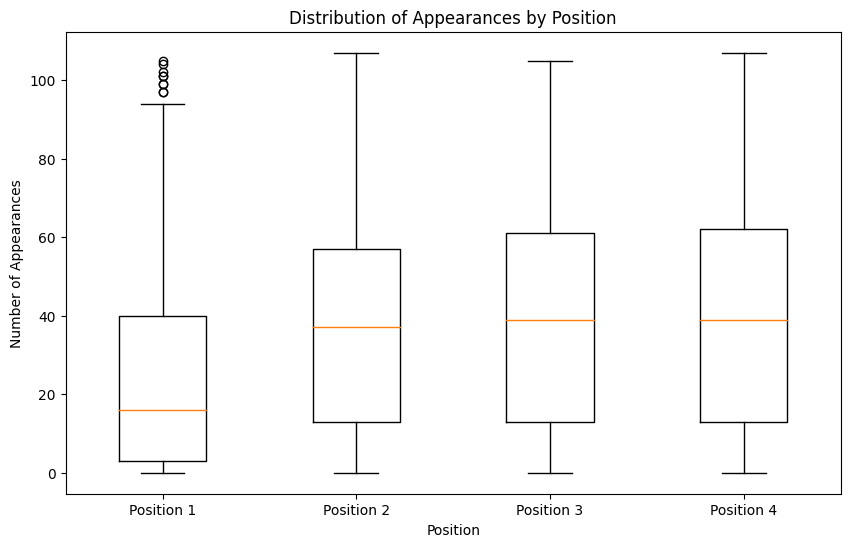

In [30]:
# @title Distribution of Appearances by Position

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot([df[df['position_encoded'] == i]['appearance'] for i in range(1, 5)], labels=['Position 1', 'Position 2', 'Position 3', 'Position 4'])
plt.xlabel('Position')
plt.ylabel('Number of Appearances')
_ = plt.title('Distribution of Appearances by Position')

In [18]:
correlation=numeric_df.corr()['highest_value']
correlation

height                 0.036776
age                    0.123468
appearance             0.418394
goals                  0.129037
assists                0.145407
yellow cards          -0.009772
second yellow cards   -0.014155
red cards             -0.007257
goals conceded        -0.061183
clean sheets          -0.008302
minutes played         0.399389
days_injured           0.234352
games_injured          0.285244
award                  0.528641
current_value          0.834553
highest_value          1.000000
position_encoded       0.101053
winger                 0.001944
Name: highest_value, dtype: float64

<Axes: xlabel='current_value', ylabel='highest_value'>

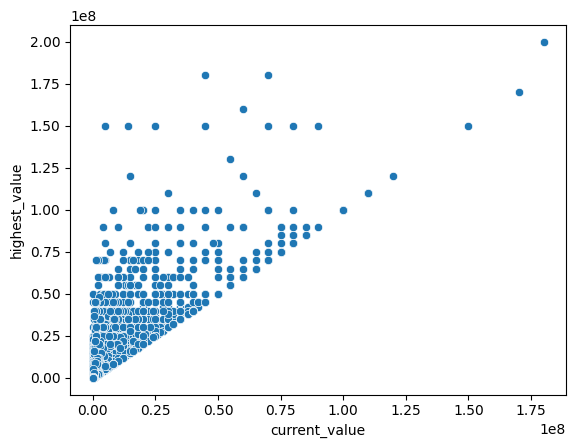

In [22]:
sns.scatterplot(x='current_value',y='highest_value',data=numeric_df)

<Axes: xlabel='position_encoded', ylabel='position'>

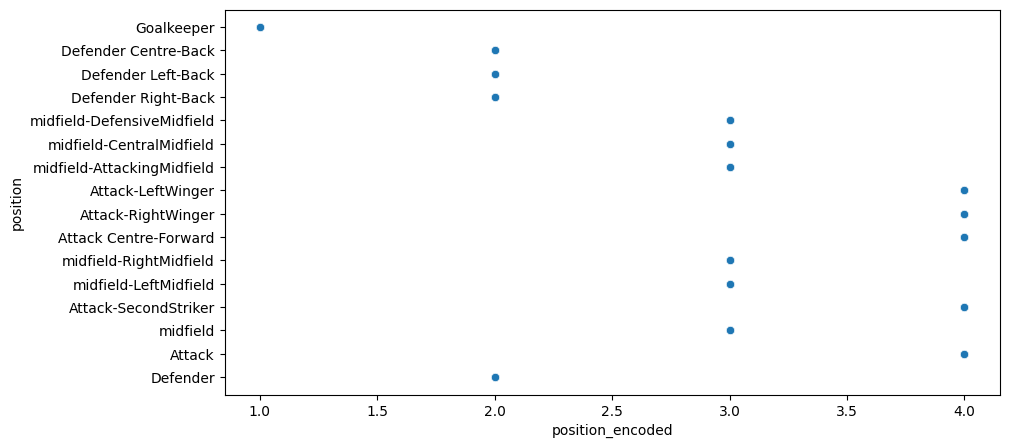

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='position_encoded',y='position',data=df)

In [15]:
position_defined={1:'Goalkeeper',2:'Defender',3:'Midfielder',4:'Forward'}

<Axes: xlabel='highest_value', ylabel='award'>

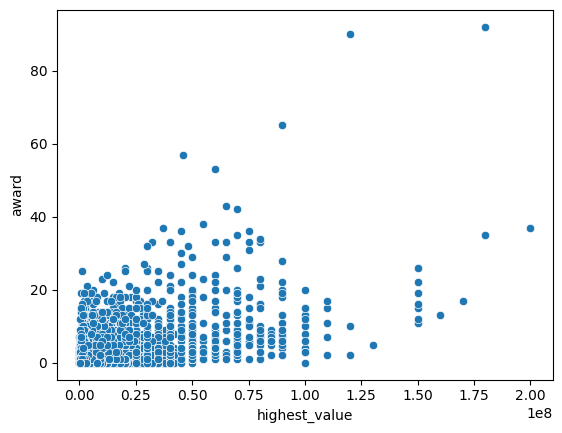

In [22]:
sns.scatterplot(x='highest_value',y='award',data=numeric_df)

<Axes: xlabel='highest_value', ylabel='award'>

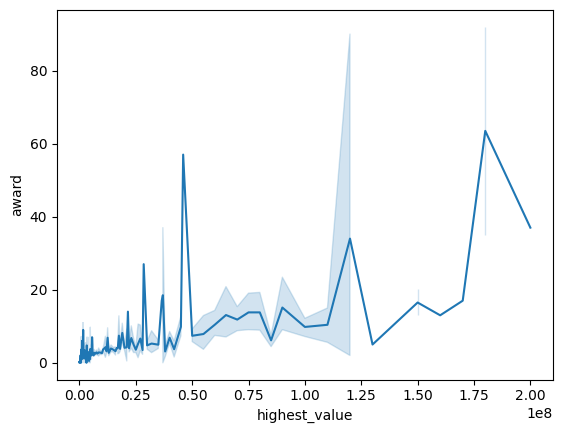

In [23]:
sns.lineplot(x='highest_value',y='award',data=numeric_df)

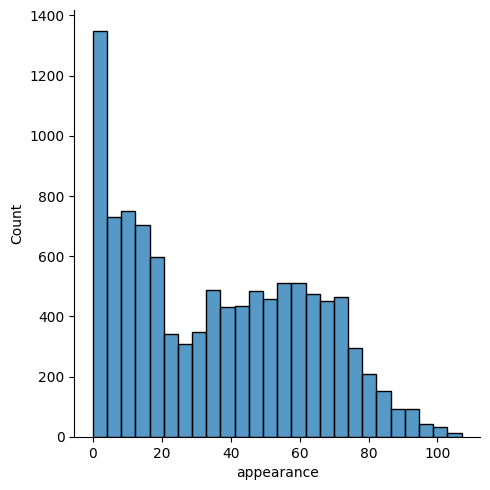

In [28]:
sns.displot(df, x="appearance"hue=)

In [29]:
df['appearance'].mean()

36.40701134461596

In [52]:
df=df.drop('player',axis=1)

In [53]:
df['winger'].value_counts()

winger
0    7447
1    3307
Name: count, dtype: int64

In [61]:
X=numeric_df.drop('highest_value',axis=1).values
y=numeric_df['highest_value'].values

In [62]:
  from sklearn.model_selection import train_test_split
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=60)

In [63]:
X_test.shape

(3227, 17)

In [121]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [122]:
X_test

array([[6.40000000e-01, 4.64285714e-01, 9.34579439e-02, ...,
        8.82352941e-04, 6.66666667e-01, 0.00000000e+00],
       [5.04807058e-01, 4.64285714e-01, 9.34579439e-03, ...,
        1.47058824e-04, 1.00000000e+00, 0.00000000e+00],
       [4.80000000e-01, 5.71428571e-01, 7.38317757e-01, ...,
        5.88235294e-02, 3.33333333e-01, 0.00000000e+00],
       ...,
       [5.40000000e-01, 5.71428571e-01, 0.00000000e+00, ...,
        5.88235294e-04, 0.00000000e+00, 0.00000000e+00],
       [6.80000000e-01, 3.21428571e-01, 5.14018692e-01, ...,
        5.88235294e-03, 6.66666667e-01, 0.00000000e+00],
       [3.60000000e-01, 3.92857143e-01, 3.08411215e-01, ...,
        7.05882353e-03, 3.33333333e-01, 1.00000000e+00]])

In [123]:
 7.38317757e-01

0.738317757

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [71]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=60,epochs=400)

Epoch 1/400
126/126 [==============================] - 2s 5ms/step - loss: 221613064716288.0000 - val_loss: 206661830574080.0000
Epoch 2/400
126/126 [==============================] - 0s 3ms/step - loss: 221611806425088.0000 - val_loss: 206658475130880.0000
Epoch 3/400
126/126 [==============================] - 0s 3ms/step - loss: 221602226634752.0000 - val_loss: 206640036970496.0000
Epoch 4/400
126/126 [==============================] - 0s 3ms/step - loss: 221565417422848.0000 - val_loss: 206582591782912.0000
Epoch 5/400
126/126 [==============================] - 0s 3ms/step - loss: 221473377615872.0000 - val_loss: 206455756029952.0000
Epoch 6/400
126/126 [==============================] - 0s 4ms/step - loss: 221287637057536.0000 - val_loss: 206214264782848.0000
Epoch 7/400
126/126 [==============================] - 0s 4ms/step - loss: 220953149702144.0000 - val_loss: 205802149249024.0000
Epoch 8/400
126/126 [==============================] - 0s 3ms/step - loss: 220431176957952.0000 -

In [74]:
eval=pd.DataFrame(model.history.history)
eval

,loss,val_loss
0,2.216131e+14,2.066618e+14
1,2.216118e+14,2.066585e+14
2,2.216022e+14,2.066400e+14
3,2.215654e+14,2.065826e+14
4,2.214734e+14,2.064558e+14
...,...,...
395,4.363590e+13,3.969128e+13
396,4.355177e+13,3.960064e+13
397,4.347070e+13,3.951973e+13
398,4.339818e+13,3.944537e+13


from matplotlib import pyplot as plt
eval['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
eval['val_loss'].plot(kind='hist', bins=20, title='val_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
eval.plot(kind='scatter', x='loss', y='val_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
eval['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
eval['val_loss'].plot(kind='line', figsize=(8, 4), title='val_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

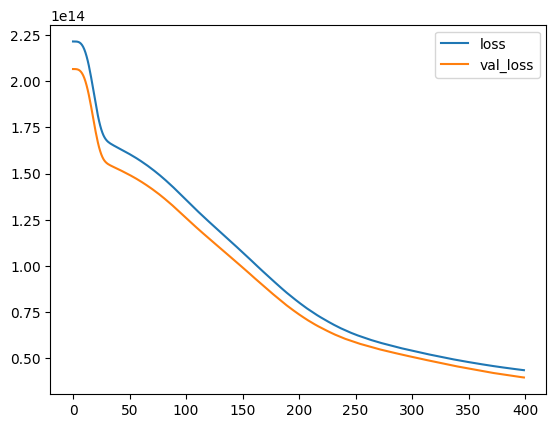

In [75]:
eval.plot()

In [77]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

predictions=model.predict(X_test)
explained_variance_score(y_test,predictions)

101/101 [==============================] - 0s 2ms/step


0.7706361873242824

In [78]:
mean_absolute_error(y_test,predictions)

2999095.4874496437

In [79]:
df['highest_value'].mean()

6152606.007067137

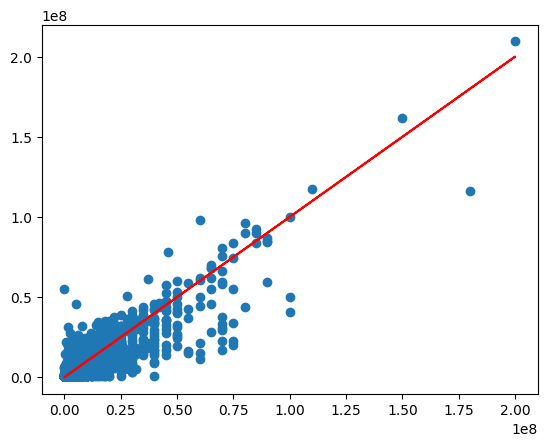

In [84]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [110]:
single_player=numeric_df.drop('highest_value',axis=1).iloc[1]

In [111]:
single_player

height                 1.960000e+02
age                    3.000000e+01
appearance             1.500000e+01
goals                  0.000000e+00
assists                0.000000e+00
yellow cards           6.901841e-02
second yellow cards    0.000000e+00
red cards              0.000000e+00
goals conceded         1.242331e+00
clean sheets           2.070552e-01
minutes played         1.304000e+03
days_injured           5.100000e+02
games_injured          5.800000e+01
award                  1.000000e+00
current_value          1.500000e+06
position_encoded       1.000000e+00
winger                 0.000000e+00
Name: 1, dtype: float64

In [137]:
single_player=scaler.transform(single_player.values.reshape(-1,17))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [106]:
sample_data

array([[1.89000000e+02, 3.20000000e+01, 1.04000000e+02, 0.00000000e+00,
        0.00000000e+00, 9.58466500e-03, 0.00000000e+00, 0.00000000e+00,
        1.21725240e+00, 3.35463259e-01, 9.39000000e+03, 4.20000000e+01,
        5.00000000e+00, 1.30000000e+01, 1.50000000e+07, 1.00000000e+00,
        0.00000000e+00]])

In [107]:
1.89000000e+02

189.0

In [120]:
1.96000000e+02

196.0

In [128]:
second_player=X_test[0]
second_player


array([0.64      , 0.46428571, 0.09345794, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.08359621, 0.10557684, 0.04424779, 0.01086957, 0.00088235,
       0.66666667, 0.        ])

In [131]:
model.predict(second_player.reshape(1,17))

1/1 [==============================] - 0s 37ms/step


array([[832408.1]], dtype=float32)

In [132]:
X_test.shape

(3227, 17)

In [134]:
df.iloc[3227]

team                                    Santos FC
position               midfield-DefensiveMidfield
height                                      181.0
age                                          33.0
appearance                                      5
goals                                         0.0
assists                                       0.0
yellow cards                             0.319149
second yellow cards                      0.319149
red cards                                     0.0
goals conceded                                0.0
clean sheets                                  0.0
minutes played                                282
days_injured                                    0
games_injured                                   0
award                                           4
current_value                              300000
highest_value                             1000000
position_encoded                                3
winger                                          0
